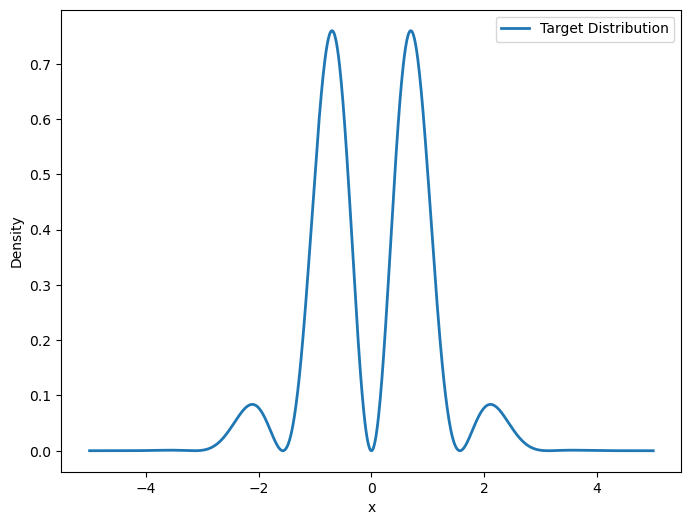

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the target distribution (unnormalized)
def target_distribution(x):
    return np.exp(-0.5 * x**2) * np.sin(2 * x)**2

#def target_distribution(x, alpha = 100):
#    # skew_normal_distribution
#    return 2 * norm.pdf(x) * norm.cdf(alpha * x)
# Plot the target distribution and the generated samples
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(8, 6))
plt.plot(x, target_distribution(x), label='Target Distribution', linewidth=2)
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

In [9]:

# Metropolis algorithm
def metropolis(iterations, proposal_std):
    samples = []
    current_sample = np.random.randn()  # Initial sample from a standard normal distribution
    
    for _ in range(iterations):
        # Propose a new sample from a normal distribution with current sample as mean
        proposed_sample = current_sample + np.random.normal(scale=proposal_std)
        
        # Calculate acceptance ratio
        acceptance_ratio = min(1, target_distribution(proposed_sample) / target_distribution(current_sample))
        
        # Accept or reject the proposed sample
        if np.random.uniform() < acceptance_ratio:
            current_sample = proposed_sample
        
        samples.append(current_sample)
    
    return np.array(samples)

In [12]:
# Number of MCMC iterations and proposal standard deviation
iterations = 10000
proposal_std = 1.0

# Generate samples using Metropolis algorithm
samples = metropolis(iterations, proposal_std)
print(len(samples))

10000


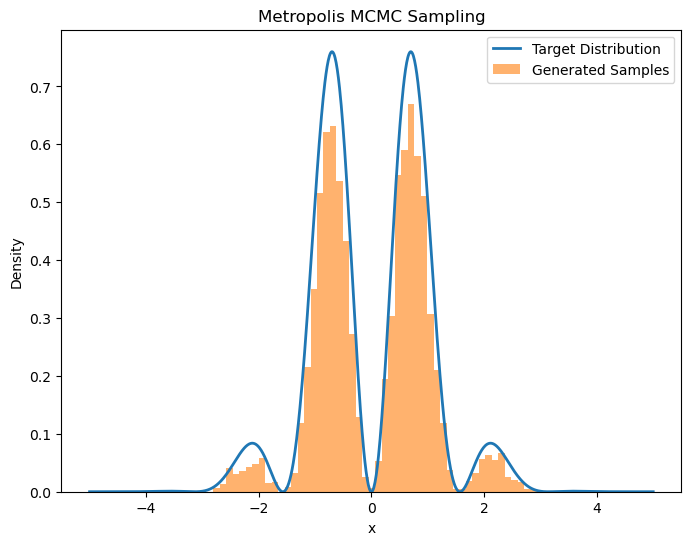

In [13]:
# Plot the target distribution and the generated samples
x = np.linspace(-5, 5, 1000)
plt.figure(figsize=(8, 6))
plt.plot(x, target_distribution(x), label='Target Distribution', linewidth=2)
plt.hist(samples, bins=50, density=True, alpha=0.6, label='Generated Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.title('Metropolis MCMC Sampling')
plt.show()